In [1]:
#顯示系統資訊
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6370587304165196305
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1712108738525633130
physical_device_desc: "device: XLA_CPU device"
]


In [2]:
#import 相關函式
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, Flatten
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.backend.tensorflow_backend import set_session 
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
from matplotlib.pyplot import imshow
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline
#設定CPU使用量
config = tf.ConfigProto() 
config.gpu_options.per_process_gpu_memory_fraction = 0.9
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [3]:
#Loss 紀錄函式 提供繪製 acc-loss 圖
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [24]:
# 抓 mnist 資料,資料轉換對應的維度
(x_train, y_train), (x_test_org, y_test_org) = mnist.load_data()

print('shape of train data   [', x_train.shape[0], x_train.shape[1], x_train.shape[2],"]")
print('shape of test  data   [', x_test_org.shape[0], x_test_org.shape[1], x_test_org.shape[2],"]")
x_train = x_train.reshape(60000, 784).astype('float32')
x_test  = x_test_org.reshape(10000, 784).astype('float32')
# 0~255 映射到 0~1
x_train /= 255
x_test /= 255
print('reshape of train data [', x_train.shape[0], x_train.shape[1],"]")
print('reshape of test  data [', x_test.shape[0], x_test.shape[1],"]")
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test_org)
print()
print("To Categorical [", y_test_org[0], "] => ", y_test[0])

history = LossHistory()

shape of train data   [ 60000 28 28 ]
shape of test  data   [ 10000 28 28 ]
reshape of train data [ 60000 784 ]
reshape of test  data [ 10000 784 ]

To Categorical [ 7 ] =>  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [25]:
# MLP模型建置
model = Sequential()

model.add(Dense(20, activation='relu', input_shape=(784,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_20 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 開始訓練
train_history = model.fit(x_train, y_train,
            batch_size=128,
            epochs=10,
            verbose=1,
            validation_data=(x_test, y_test),
            callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.1298 - acc: 0.9612 - val_loss: 0.1580 - val_acc: 0.9529
Epoch 2/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.1251 - acc: 0.9640 - val_loss: 0.1568 - val_acc: 0.9545
Epoch 3/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.1196 - acc: 0.9639 - val_loss: 0.1658 - val_acc: 0.9525
Epoch 4/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.1161 - acc: 0.9650 - val_loss: 0.1592 - val_acc: 0.9550
Epoch 5/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.1127 - acc: 0.9660 - val_loss: 0.1582 - val_acc: 0.9543
Epoch 6/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.1092 - acc: 0.9676 - val_loss: 0.1526 - val_acc: 0.9556
Epoch 7/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.1058 - acc: 0.9685 - val_loss: 0.1592 - val_acc: 0.954

10000/10000 [==============================] - 0s 9us/step
[Info] Accuracy of testing data = 95.4%

Test score: 0.1609362931717187
Test accuracy: 0.9541


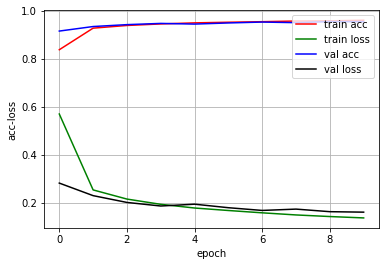

In [21]:
# 模型评估
score = model.evaluate(x_test, y_test, verbose=1)
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  
print()
print('Test score:', score[0])
print('Test accuracy:', score[1])

# 繪製 acc-loss 曲线
history.loss_plot('epoch')

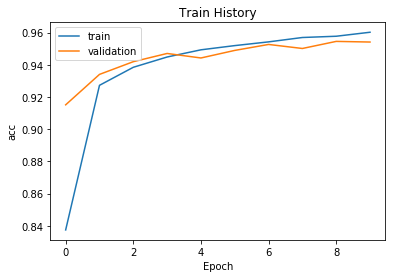

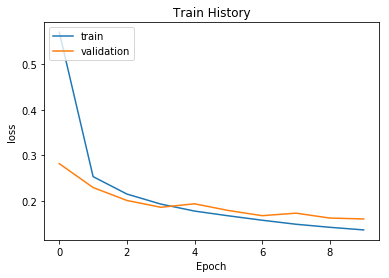

In [15]:
# 個別繪製 acc and loss 曲线
from utils import *  
if isDisplayAvl():  
    show_train_history(train_history, 'acc', 'val_acc')  
    show_train_history(train_history, 'loss', 'val_loss')  

[5 9 8 7 2 3 0 2 4 2]



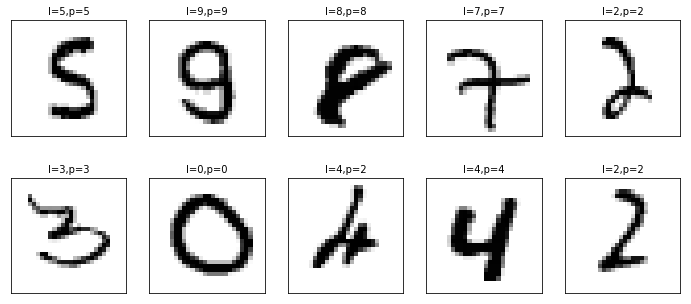

[Info] Display Confusion Matrix:
predict    0     1    2    3    4    5    6    7    8    9
label                                                     
0        964     0    2    3    0    0    4    2    4    1
1          0  1115    6    2    0    1    3    2    6    0
2          5     2  988   13    2    2    4    8    8    0
3          1     0   14  954    0   15    0   10   13    3
4          1     0   11    1  933    0    9    8    3   16
5          8     3    0   18    6  823    9    3   16    6
6          8     2    7    2    4    5  925    0    5    0
7          2     6   17    8    3    1    0  983    3    5
8          7     1    8   13    7    3    5    7  922    1
9          6     5    2   12   26    5    0   12    7  934



In [23]:
# 模型评估 數據比對
prediction = model.predict_classes(x_test)  # Making prediction and save result to prediction  
print("%s\n" % (prediction[240:250]))  
if isDisplayAvl():  
    plot_images_labels_predict(x_test_org, y_test_org, prediction, idx=240) 
    
# 模型评估 數據分布統計  
import pandas as pd  
print("[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(y_test_org, prediction, rownames=['label'], colnames=['predict']))  